## **diabetes.csv DL Classification**

In [1]:
import pandas as pd
import os

# 데이터 불러오기
file_name = 'diabetes.csv'
full_file_path = os.path.join(os.getcwd() + "\\" + file_name)
df = pd.read_csv(full_file_path)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [2]:
# 결측치 확인
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
from sklearn.preprocessing import StandardScaler

# 피처, 레이블 데이터 나누기
X = df.drop('Outcome', axis = 1).values
y = df['Outcome'].values

# 데이터 스케일링
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [5]:
# 레이블 확인
df['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [6]:
# 원핫 인코딩
Y = pd.get_dummies(y).values
Y

array([[False,  True],
       [ True, False],
       [False,  True],
       ...,
       [ True, False],
       [False,  True],
       [ True, False]])

In [7]:
X


array([[ 0.63994726,  0.84832379,  0.14964075, ...,  0.20401277,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575, ..., -0.68442195,
        -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, ..., -1.10325546,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 ,  0.00330087,  0.14964075, ..., -0.73518964,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.1597866 , -0.47073225, ..., -0.24020459,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.8730192 ,  0.04624525, ..., -0.20212881,
        -0.47378505, -0.87137393]])

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0) 
X_train.shape, X_test.shape, y_train.shape, y_test.shape 

((614, 8), (154, 8), (614, 2), (154, 2))

In [9]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

# 모델 생성
model = Sequential()

# 입력층 및 은닉층 추가
model.add(Dense(256, input_shape = (8, ), activation = 'relu'))
model.add(Dense(64, activation = 'relu'))  
model.add(Dense(32, activation = 'relu'))  
model.add(Dense(16, activation = 'relu'))  

# 출력층 (이진 분류라면 units=1, 다중 이진 분류라면 units=2)
model.add(Dense(2, activation = 'sigmoid'))  # 이진 분류

# 모델 컴파일 (학습률 설정 방식 수정)
model.compile(optimizer = Adam(learning_rate = 0.04), loss = 'binary_crossentropy', metrics = ['accuracy'])

# 모델 요약 정보 출력
model.summary()


c:\Users\User\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 256)            │         2,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 2)              │            34 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,394 (83.57 KB)

 Trainable params: 21,394 (83.57 KB)

 Non-trainable params: 0 (0.00 B)

In [10]:
import numpy as np

model_history = model.fit(x = X_train, y = y_train, epochs = 30, batch_size = 32, validation_split = 0.1)
y_pred = model.predict(X_test)

y_test_class = np.argmax(y_test, axis = 1)
y_pred_class = np.argmax(y_pred, axis = 1)

Epoch 1/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.5898 - loss: 0.6357 - val_accuracy: 0.7258 - val_loss: 0.5008
Epoch 2/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7726 - loss: 0.5126 - val_accuracy: 0.7581 - val_loss: 0.5414
Epoch 3/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7675 - loss: 0.5032 - val_accuracy: 0.8065 - val_loss: 0.5314
Epoch 4/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7875 - loss: 0.4915 - val_accuracy: 0.7742 - val_loss: 0.5236
Epoch 5/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7939 - loss: 0.4727 - val_accuracy: 0.7903 - val_loss: 0.5802
Epoch 6/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7566 - loss: 0.4561 - val_accuracy: 0.7581 - val_loss: 0.5522
Epoch 7/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7518 - loss: 0.5048 - val_accuracy: 0.7903 - val_loss: 0.5723
Epoch 8/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7908 - loss: 0.4767 - val_accuracy: 0.7903 - val_loss

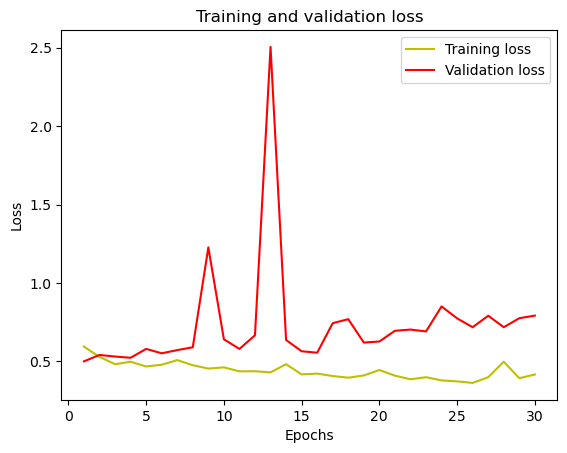

In [11]:
loss = model_history.history['loss']
val_loss =model_history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

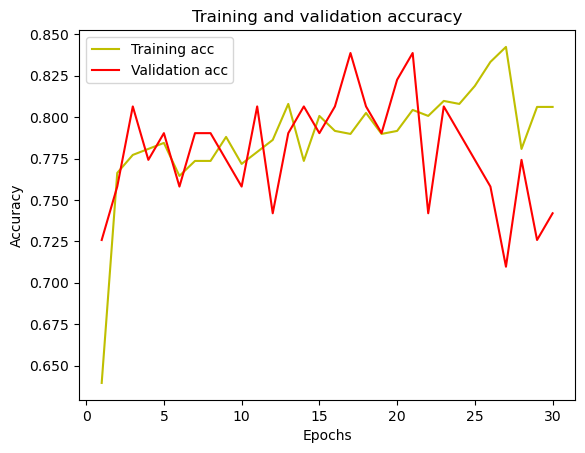

In [12]:
acc =model_history.history['accuracy']
val_acc =model_history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [13]:
from sklearn.metrics import classification_report,confusion_matrix

# Accuracy of the predicted values
print(classification_report(y_test_class,y_pred_class))
print(confusion_matrix(y_test_class,y_pred_class))

              precision    recall  f1-score   support

           0       0.88      0.76      0.81       107
           1       0.58      0.77      0.66        47

    accuracy                           0.76       154
   macro avg       0.73      0.76      0.74       154
weighted avg       0.79      0.76      0.77       154

[[81 26]
 [11 36]]


## **diabetes.csv DL Regression**

In [38]:
import pandas as pd
import os

# 데이터 불러오기
file_name = 'diabetes.csv'
full_file_path = os.path.join(os.getcwd() + "\\" + file_name)
df = pd.read_csv(full_file_path)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [35]:
# 결측치 확인
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [39]:
# 기존 레이블인 Outcome 제거
df = df.drop('Outcome', axis = 1)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [40]:
# 피처, 레이블 데이터
X = df.drop('BMI', axis = 1).values
y = df['BMI'].values

# 데이터 스케일링
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [41]:
# 원핫 인코딩
Y = pd.get_dummies(y).values
Y

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [42]:
X

array([[ 0.63994726,  0.84832379,  0.14964075, ..., -0.69289057,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575, ..., -0.69289057,
        -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, ..., -0.69289057,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 ,  0.00330087,  0.14964075, ...,  0.27959377,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.1597866 , -0.47073225, ..., -0.69289057,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.8730192 ,  0.04624525, ..., -0.69289057,
        -0.47378505, -0.87137393]])

In [43]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0) 
X_train.shape, X_test.shape, y_train.shape, y_test.shape 

((614, 7), (154, 7), (614, 248), (154, 248))

In [44]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

# 모델 생성
model = Sequential()

# 입력층 및 은닉층 추가
model.add(Dense(64, input_shape = (7,), activation = 'relu'))  
model.add(Dense(32, activation = 'relu'))  
model.add(Dense(16, activation = 'relu'))  

# 출력층 (활성화 함수 없음 → 회귀 모델)
model.add(Dense(1))  

# 모델 컴파일 (회귀용 손실 함수 및 학습률 조정)
model.compile(optimizer=Adam(learning_rate = 0.001), loss = 'mean_squared_error', metrics = ['mae'])

# 모델 요약 정보 출력
model.summary()


c:\Users\User\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_13 (Dense)                │ (None, 64)             │           512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,137 (12.25 KB)

 Trainable params: 3,137 (12.25 KB)

 Non-trainable params: 0 (0.00 B)

In [45]:
N_EPOCHS = 10

history=model.fit(x = X_train, y = y_train, epochs = N_EPOCHS, batch_size = 32, validation_split = 0.1)
y_pred = model.predict(X_test)

Epoch 1/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0194 - mae: 0.0927 - val_loss: 0.0068 - val_mae: 0.0456
Epoch 2/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0062 - mae: 0.0400 - val_loss: 0.0057 - val_mae: 0.0331
Epoch 3/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0052 - mae: 0.0301 - val_loss: 0.0052 - val_mae: 0.0272
Epoch 4/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0048 - mae: 0.0255 - val_loss: 0.0051 - val_mae: 0.0259
Epoch 5/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0046 - mae: 0.0221 - val_loss: 0.0050 - val_mae: 0.0248
Epoch 6/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0045 - mae: 0.0199 - val_loss: 0.0049 - val_mae: 0.0247
Epoch 7/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0044 - mae: 0.0192 - val_loss: 0.0048 - val_mae: 0.0235
Epoch 8/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0043 - mae: 0.0175 - val_loss: 0.0048 - val_mae: 0.0230
Epoch 9/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0043 - mae:

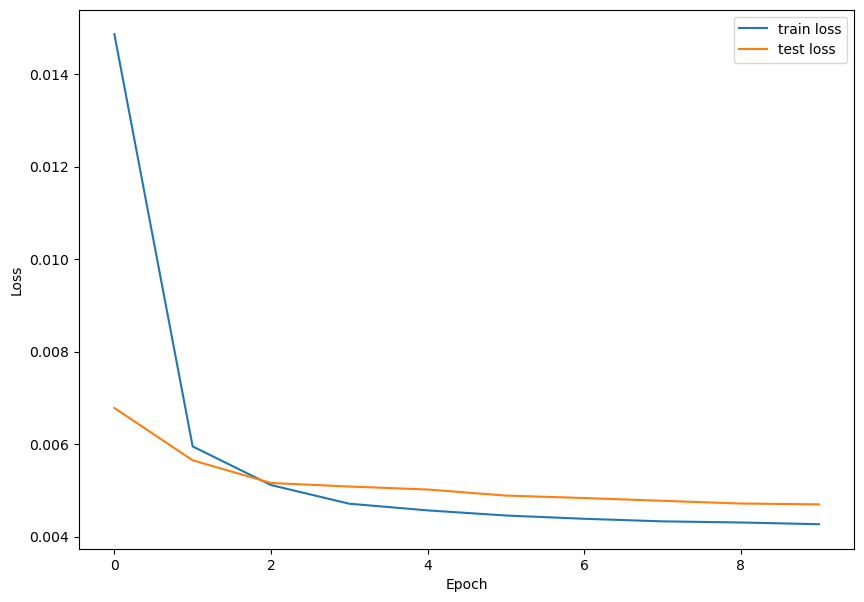

In [46]:
# loss 체크
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
plt.plot(range(N_EPOCHS), history.history['loss'], label='train loss')
plt.plot(range(N_EPOCHS), history.history['val_loss'], label='test loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [47]:
# mse
model.evaluate(X_test, y_test)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0045 - mae: 0.0201 


[0.004509136080741882, 0.020733293145895004]